In [3]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import datetime as dt 
import dateutil.relativedelta as rd
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
plt.style.use('ggplot')

In [4]:
data = pd.read_excel('loan data main.xlsx')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [6]:
data.columns = data.columns.str.replace('.','_').str.lower()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   uniqueid                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   current_pincode_id                   233154 non-null  int64         
 8   date_of_birth                        233154 non-null  datetime64[ns]
 9   employment_type                      225493 non-null  object        
 

In [8]:
data.duplicated().any()

False

In [9]:
data.isnull().sum()

uniqueid                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
current_pincode_id                        0
date_of_birth                             0
employment_type                        7661
disbursaldate                             0
state_id                                  0
employee_code_id                          0
mobileno_avl_flag                         0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                

In [10]:
id_data =[  'uniqueid', 'branch_id', 'state_id', 'manufacturer_id', 'current_pincode_id', 'state_id', 'employee_code_id']

In [11]:
for i in id_data:
    print('No. of Unique values for {} : \n{}'.format(i.upper(),data[i].nunique()) )

No. of Unique values for UNIQUEID : 
233154
No. of Unique values for BRANCH_ID : 
82
No. of Unique values for STATE_ID : 
22
No. of Unique values for MANUFACTURER_ID : 
11
No. of Unique values for CURRENT_PINCODE_ID : 
6698
No. of Unique values for STATE_ID : 
22
No. of Unique values for EMPLOYEE_CODE_ID : 
3270


In [12]:
cat_cols = ['branch_id', 'supplier_id', 'manufacturer_id', 'state_id',
            'new_accts_in_last_six_months','delinquent_accts_in_last_six_months',
            'pri_no_of_accts', 'pri_active_accts','pri_overdue_accts',
            'sec_no_of_accts', 'sec_active_accts','sec_overdue_accts','average_acct_age']
for i in cat_cols :
    data[i] = data[i].astype('category')

In [13]:
binary_columns = list(data.nunique()[data.nunique() == 2].index)

In [14]:
data.describe(include = 'category')

,branch_id,supplier_id,manufacturer_id,state_id,pri_no_of_accts,pri_active_accts,pri_overdue_accts,sec_no_of_accts,sec_active_accts,sec_overdue_accts,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age
count,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154
unique,82,2953,11,22,108,40,22,37,23,9,26,14,192
top,2,18317,86,4,0,0,0,0,0,0,0,0,0yrs 0mon
freq,13138,1432,109534,44870,116950,137016,206879,227289,229337,231817,181494,214959,119373


In [15]:
for i in binary_columns:
    vc = data[i].value_counts()
    print(i.replace('_',' ').upper(), ':')
    for j in vc.index :
        print(j ,':', vc[j])

EMPLOYMENT TYPE :
Self employed : 127635
Salaried : 97858
AADHAR FLAG :
1 : 195924
0 : 37230
PAN FLAG :
0 : 215533
1 : 17621
VOTERID FLAG :
0 : 199360
1 : 33794
DRIVING FLAG :
0 : 227735
1 : 5419
PASSPORT FLAG :
0 : 232658
1 : 496
LOAN DEFAULT :
0 : 182543
1 : 50611


In [16]:
col = cat_cols + binary_columns

quant = data.loc[:,~data.columns.isin(col)]

quant.describe().loc[['min','25%','mean','50%','75%','max','std']].round(1)


,uniqueid,disbursed_amount,asset_cost,ltv,current_pincode_id,employee_code_id,mobileno_avl_flag,perform_cns_score,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,no_of_inquiries
min,417428.0,13320.0,37000.0,10.0,1.0,1.0,1.0,0.0,-6678296.0,0.000000e+00,0.000000e+00,-574647.0,0.0,0.0,0.0,0.0,0.0
25%,476786.2,47145.0,65717.0,68.9,1511.0,713.0,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
mean,535917.6,54357.0,75865.1,74.7,3396.9,1549.5,1.0,289.5,165900.1,2.185039e+05,2.180659e+05,5427.8,7295.9,7180.0,13105.5,323.3,0.2
50%,535978.5,53803.0,70946.0,76.8,2970.0,1451.0,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
75%,595039.8,60413.0,79201.8,83.7,5677.0,2362.0,1.0,678.0,35006.5,6.250000e+04,6.080000e+04,0.0,0.0,0.0,1999.0,0.0,0.0
max,671084.0,990572.0,1628992.0,95.0,7345.0,3795.0,1.0,890.0,96524920.0,1.000000e+09,1.000000e+09,36032852.0,30000000.0,30000000.0,25642806.0,4170901.0,36.0
std,68315.7,12971.3,18944.8,11.5,2238.1,975.3,0.0,338.4,942273.6,2.374794e+06,2.377744e+06,170237.0,183156.0,182592.5,151367.9,15553.7,0.7


In [17]:
data.nunique()

uniqueid                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
current_pincode_id                       6698
date_of_birth                           15433
employment_type                             2
disbursaldate                              84
state_id                                   22
employee_code_id                         3270
mobileno_avl_flag                           1
aadhar_flag                                 2
pan_flag                                    2
voterid_flag                                2
driving_flag                                2
passport_flag                               2
perform_cns_score                         573
perform_cns_score_description              20
pri_no_of_accts                   

In [18]:
data.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [19]:
def transform(x):
    if x == 1: return 'Defaulter'
    if x == 0: return 'Non-Defaulter'
data['loan_default_text'] = data.loan_default.apply(transform)

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


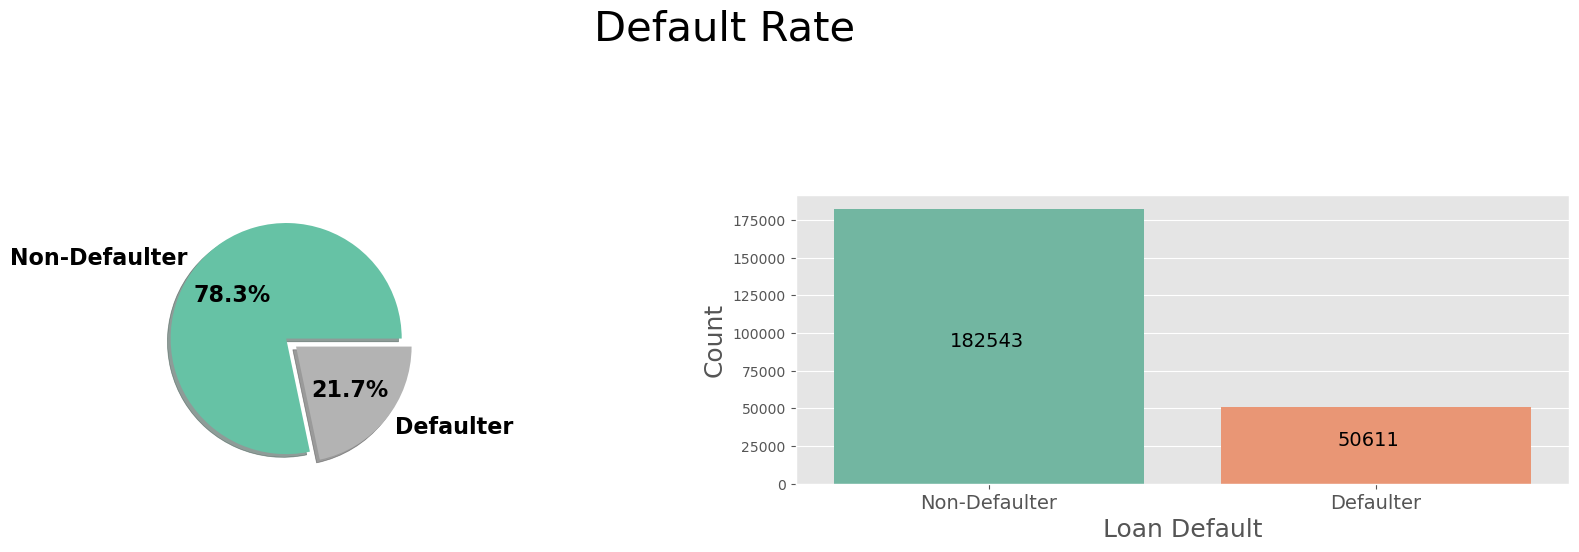

In [20]:
f, axes = plt.subplots(1,2, figsize = (18,6))
vc = data.loan_default_text.value_counts()
vc.plot.pie(ax = axes[0], radius = 1, cmap = 'Set2' , explode = [0.01,0.1], shadow = True, autopct = '%1.1f%%',
           textprops = {'family': 'times','color': 'black','weight': 'bold','size': 16}, )
axes[0].set_ylabel('')
sns.countplot('loan_default_text', data = data, ax = axes[1], palette='Set2')
for i in range(len(vc)):
    axes[1].annotate(str(vc[i]), (i-0.1,(vc[i]/2)), fontsize = 14)
axes[1].set_ylim(0,axes[1].set_ylim()[1]+5)
axes[1].set_xlabel('Loan Default',fontsize = 18, family = 'times')
axes[1].set_ylabel('Count',fontsize = 18, family = 'times')
axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize = 14, family = 'times')
f.suptitle('Default Rate\n', fontsize = 30, family = 'times')
plt.tight_layout(pad = 4)
plt.show()

In [21]:
def barplot(var):
    var_name = var.replace('_',' ').title()
    plt.figure(figsize = (20,5))
    sns.countplot(var,data = data, palette='Set2')
    plt.title(var_name+'\n',family='times', weight ='bold',fontsize= 25)
    plt.tight_layout()
    plt.xlabel(var_name,family='times',fontsize= 16)
    plt.ylabel('Frequency',family='georgia',fontsize= 16)
    plt.show()

In [22]:
def cat_vs_target(var):
    var_name = var.replace('_',' ').title()
    plt.figure(figsize = (20,5))
    sns.countplot(var,hue = 'loan_default_text', data = data, palette='Set2')
    plt.title(var_name + ' vs Target',family='times', weight ='bold',fontsize= 25)
    plt.tight_layout()
    plt.xlabel(var_name ,family='times',fontsize= 16)
    plt.ylabel('Frequency',family='georgia',fontsize= 16)
    plt.show()

In [23]:
def chi_test(var):
    ct = pd.crosstab(data[var], data.loan_default_text)
    st, p, df, ef = stats.chi2_contingency(ct)
    var_name = var.replace('_',' ')
    if p >= 0.05:
        text = ('{} and Target are independent'.format(var_name.title()))
    else :
        text = ('{} and Target are dependent'.format(var_name.title()))
    plt.figure(figsize = (1,1))
    plt.plot([0,0],[0,0])
    plt.xlim(0,50)
    plt.ylim(0,5)
    plt.axis('off')
    plt.annotate(text,xy = (2.5,2.5), fontsize= 25 )
    plt.show()

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


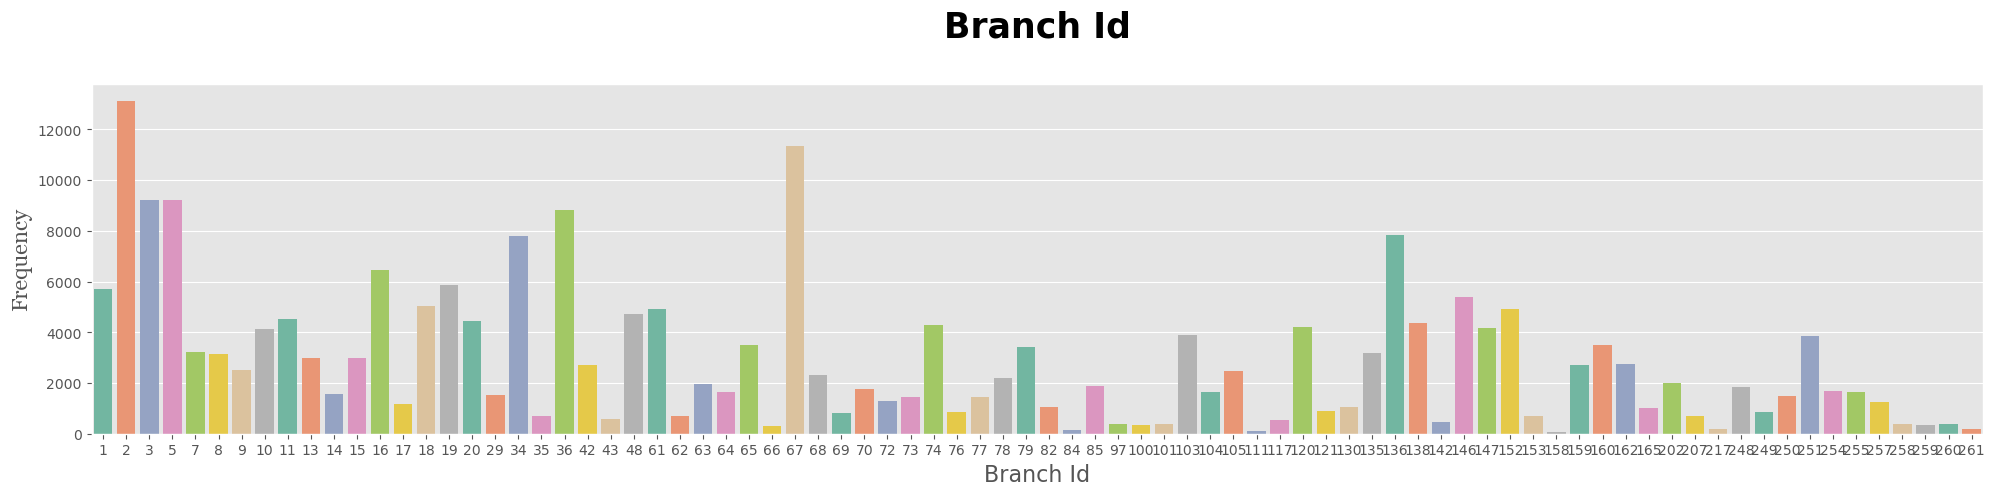

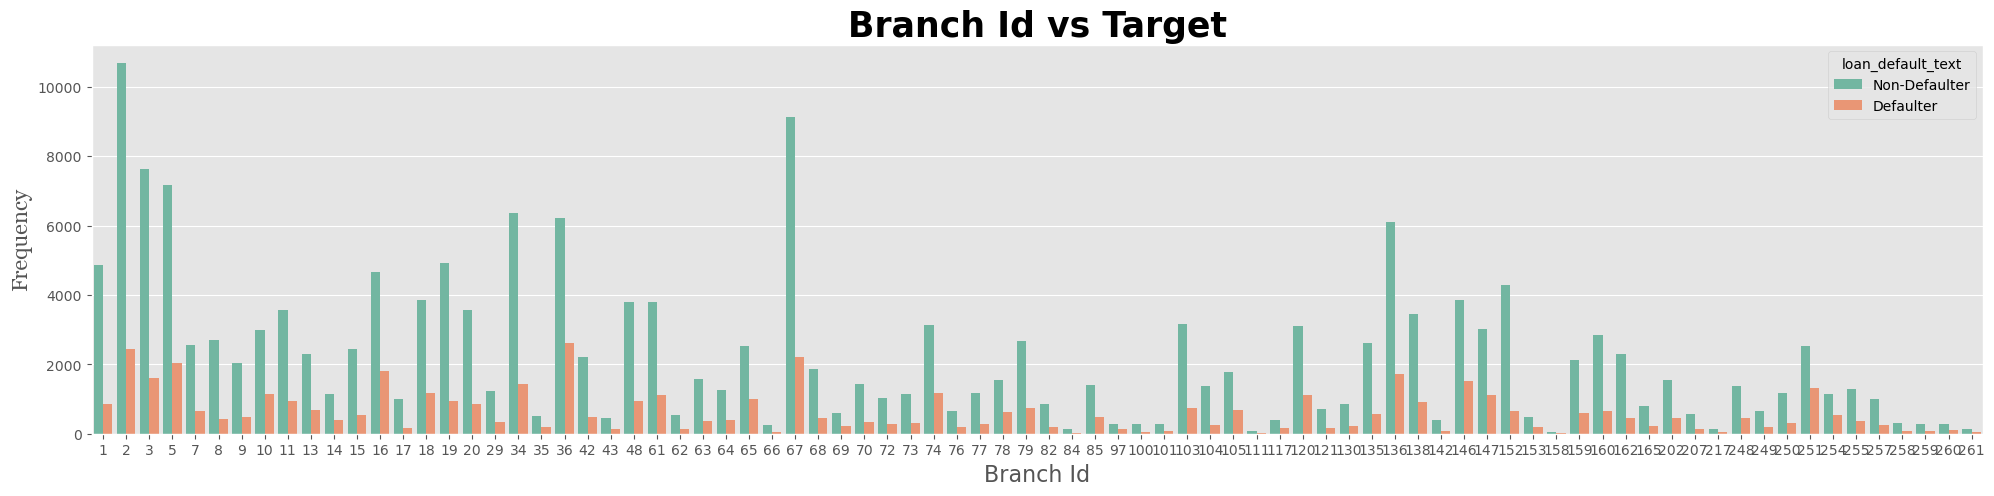

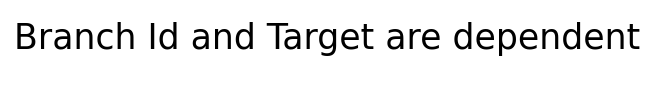

In [24]:
var = 'branch_id'
barplot(var)
cat_vs_target(var)
chi_test(var)

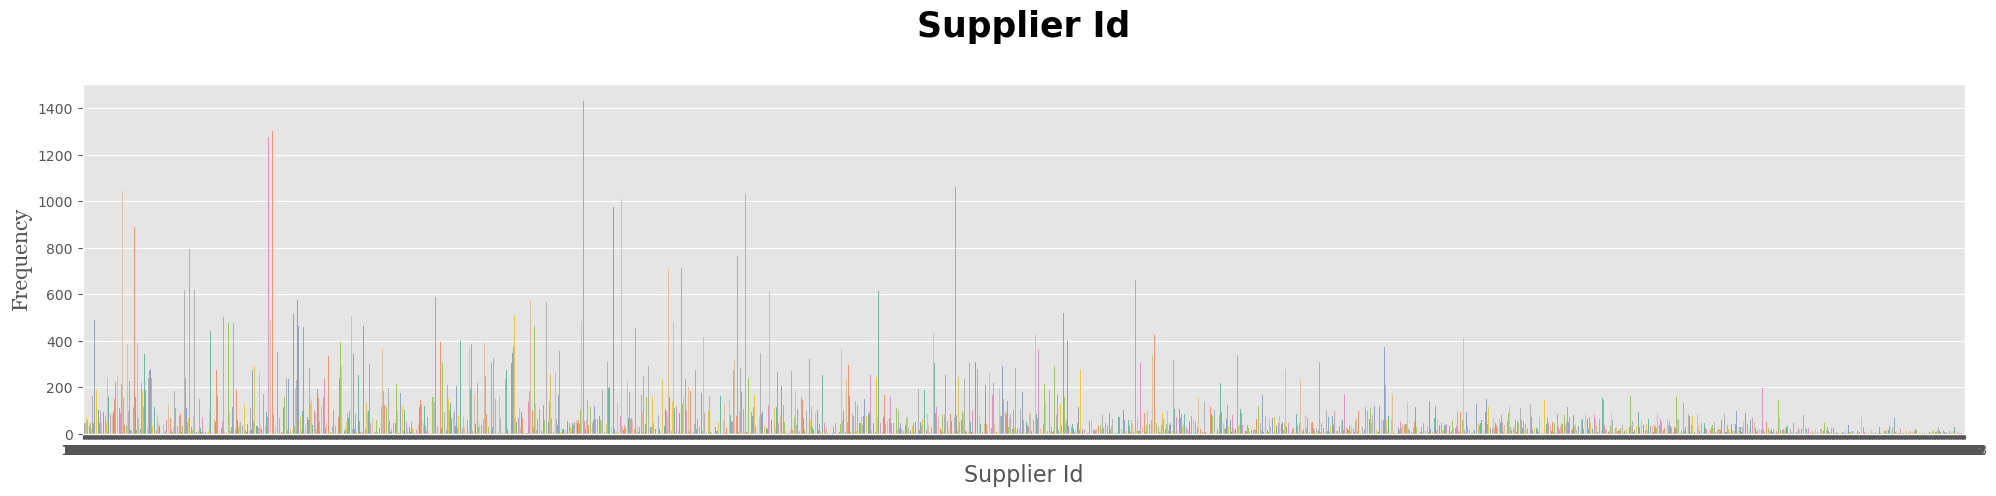

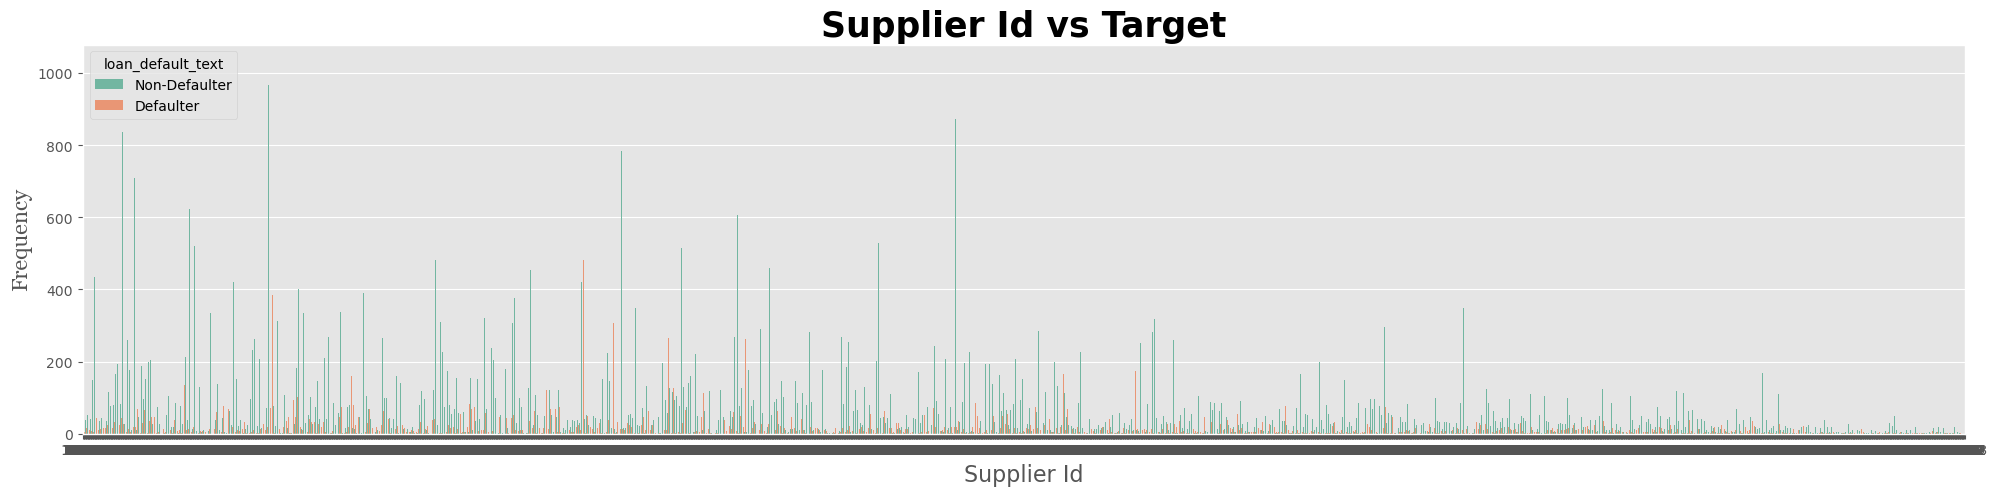

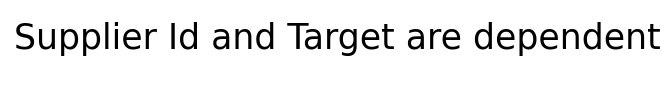

In [25]:
var = 'supplier_id'
barplot(var)
cat_vs_target(var)
chi_test(var)

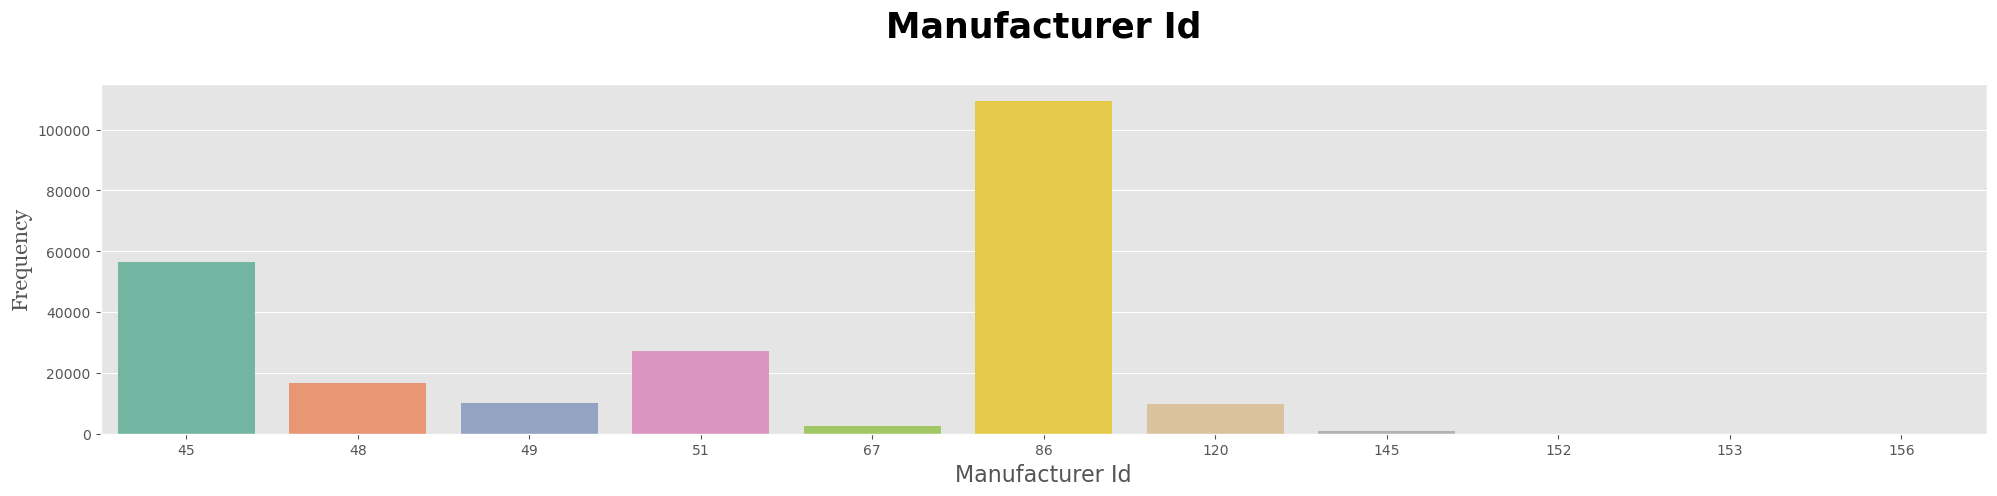

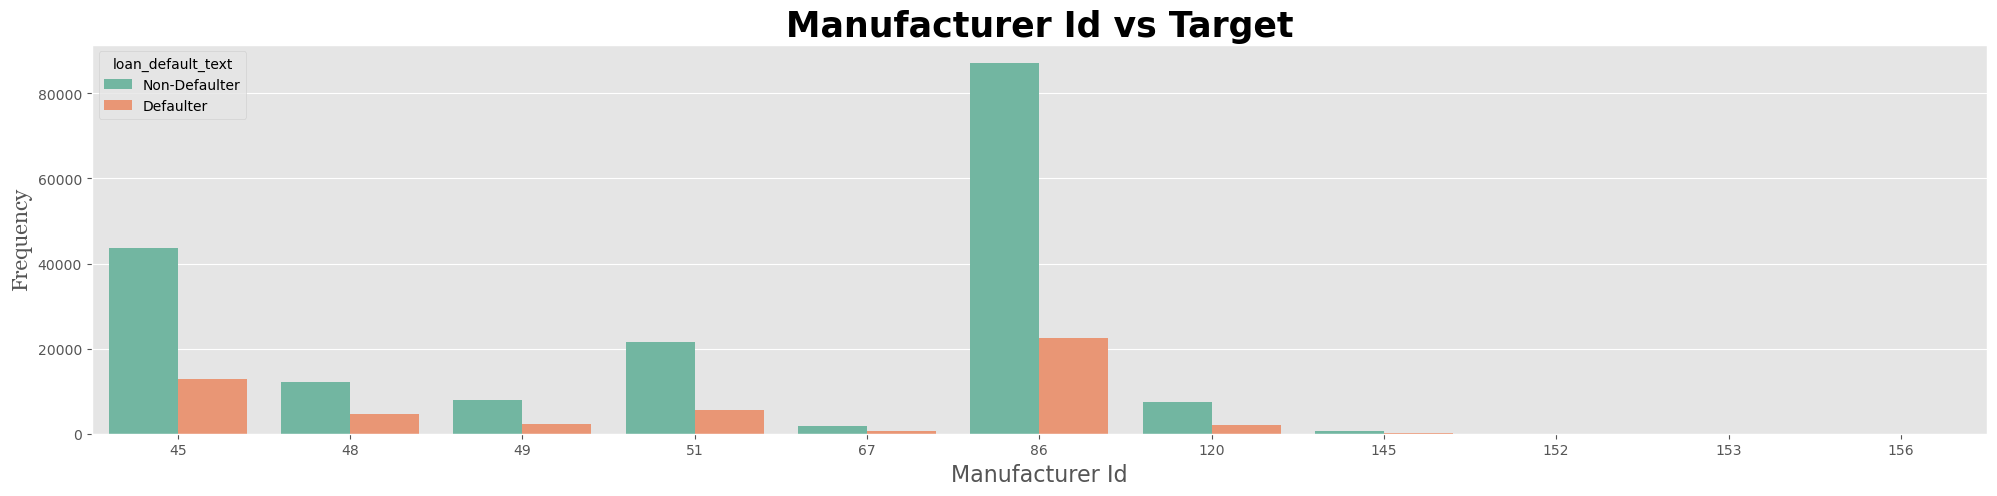

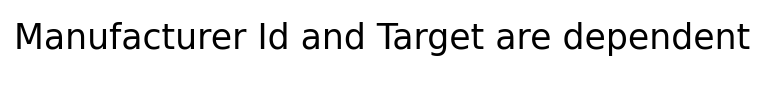

In [26]:
var = 'manufacturer_id'
barplot(var)
cat_vs_target(var)
chi_test(var)

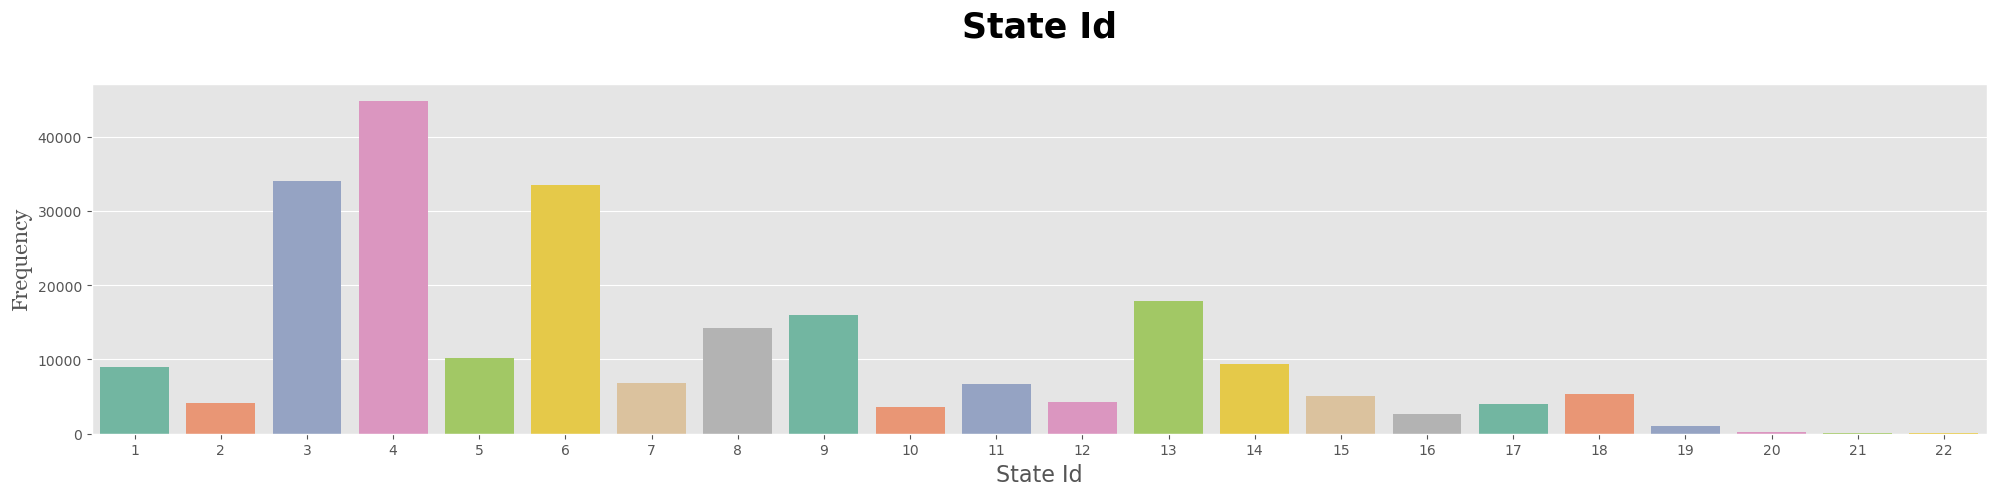

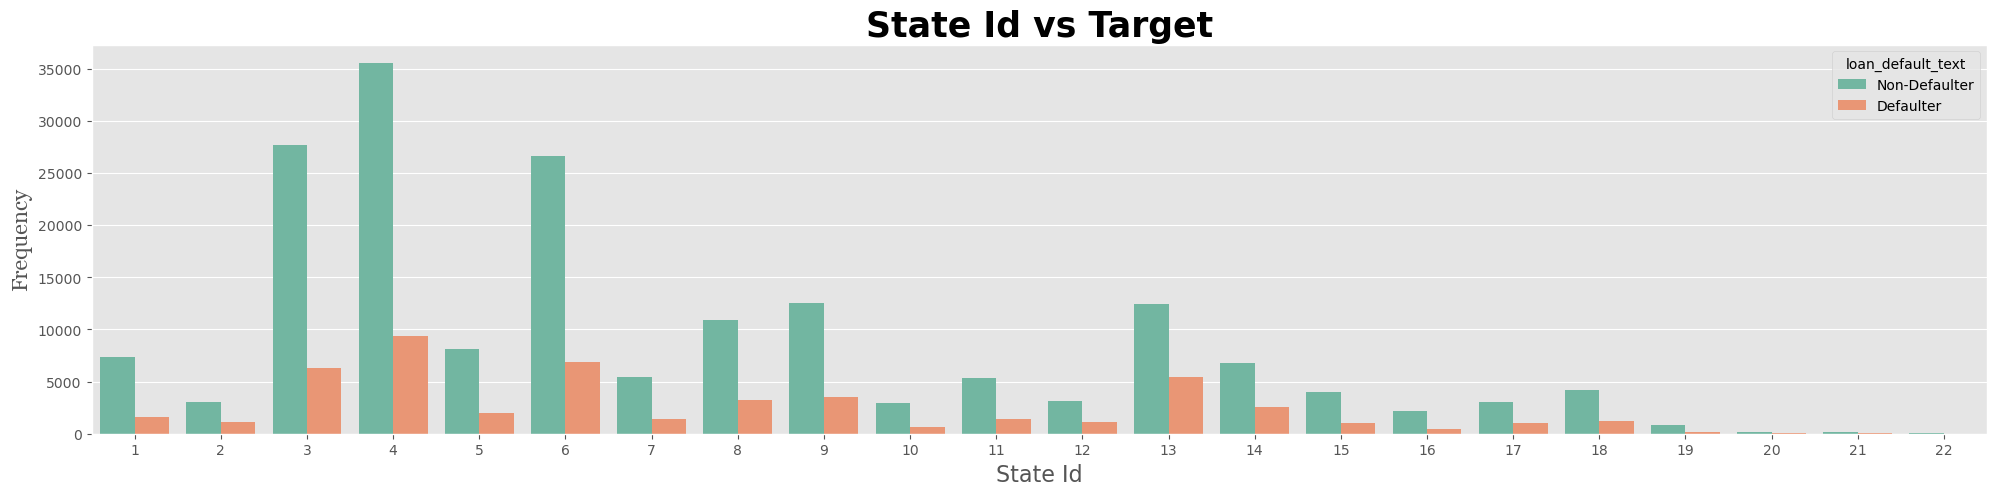

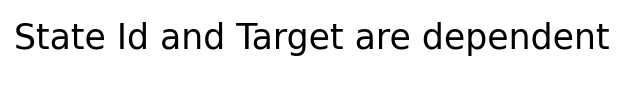

In [27]:
var = 'state_id'
barplot(var)
cat_vs_target(var)
chi_test(var)

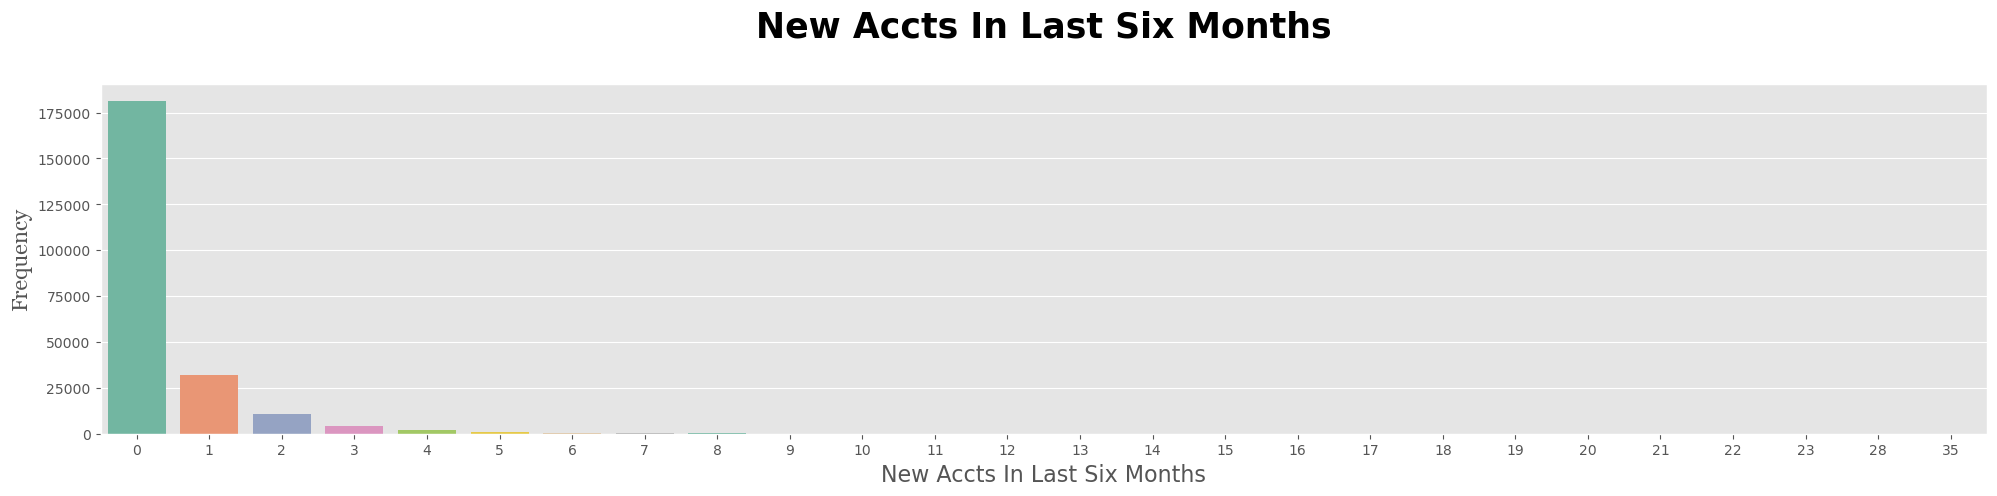

In [29]:
var = 'new_accts_in_last_six_months'
barplot(var)

In [30]:
# Checking unique values
print("Distinct Emp Type :",data.employment_type.unique())
#Checking missing valus in percentage
print("Missing Emp Type {:.2f} %".format(data.employment_type.isnull().sum() / len(data) * 100))

Distinct Emp Type : ['Salaried' 'Self employed' nan]
Missing Emp Type 3.29 %


In [31]:
data.employment_type.fillna('Unemployed',inplace = True)

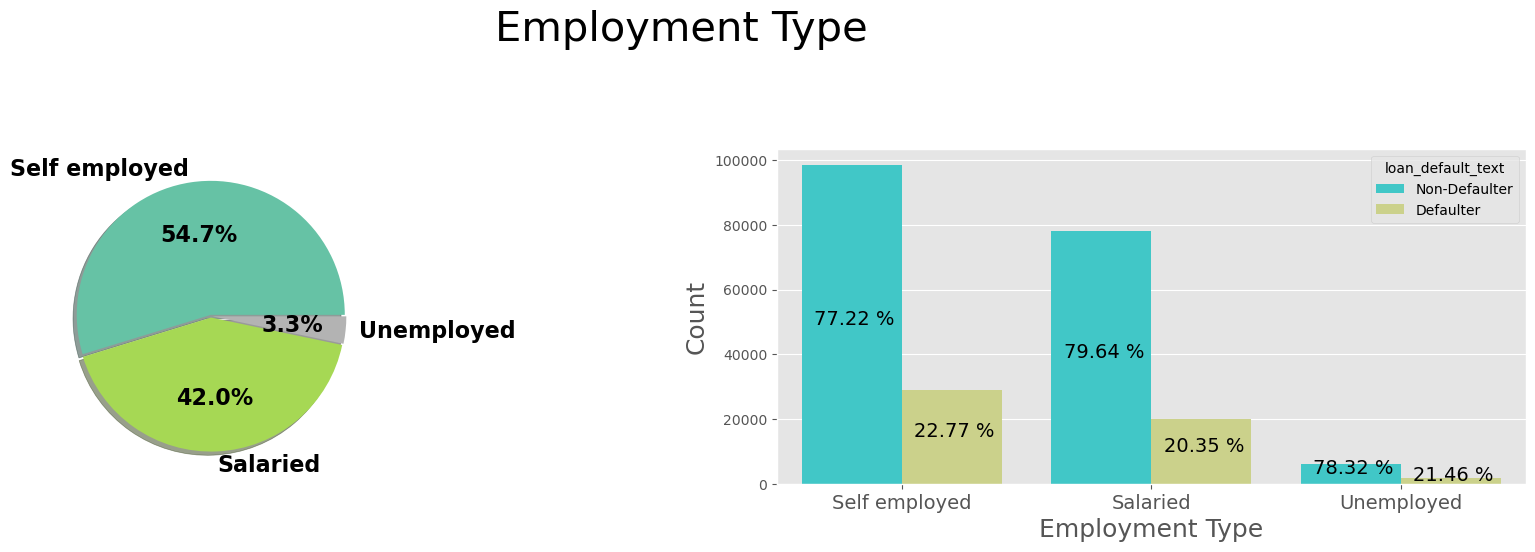

In [32]:
var = 'employment_type'
var_name = var.replace('_',' ').title()
f, axes = plt.subplots(1,2, figsize = (18,6))
vc = data[var].value_counts()
vc.plot.pie(ax = axes[0], radius = 1, cmap = 'Set2' , explode = [0.01,0.01, 0.01], shadow = True, autopct = '%1.1f%%',
           textprops = {'family': 'times','color': 'black','weight': 'bold','size': 16}, )
axes[0].set_ylabel('')

sns.countplot(x = var, data = data, hue = 'loan_default_text',ax = axes[1], palette='rainbow', order = vc.index)
axes[1].set_ylim(0,axes[1].set_ylim()[1]+5)
axes[1].set_xlabel(var_name,fontsize = 18, family = 'times')
axes[1].set_ylabel('Count',fontsize = 18, family = 'times')
axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize = 14, family = 'times')
vc2 = pd.crosstab(data[var], data.loan_default_text).loc[vc.index]
vc2['Perc_Def'] = (vc2.Defaulter/vc2.sum(axis = 1)*100).round(2)
vc2['Perc_NDef'] = (vc2['Non-Defaulter']/vc2.sum(axis = 1)*100).round(2)
for i in range(len(vc2.index)):
    axes[1].annotate(str(vc2.iloc[i]['Perc_NDef'])+' %', (i - 0.35,vc2.iloc[i]['Non-Defaulter']/2+10), fontsize = 14)
    axes[1].annotate(str(vc2.iloc[i]['Perc_Def'])+' %', (i + 0.05,vc2.iloc[i]['Defaulter']/2+10), fontsize = 14)
f.suptitle(var_name , fontsize = 30, family = 'times')
plt.tight_layout(pad = 4)
plt.show()

In [33]:
data['age_on_disbursal'] = data.apply(lambda row : rd.relativedelta(row.disbursaldate,row.date_of_birth).years, axis = 1)

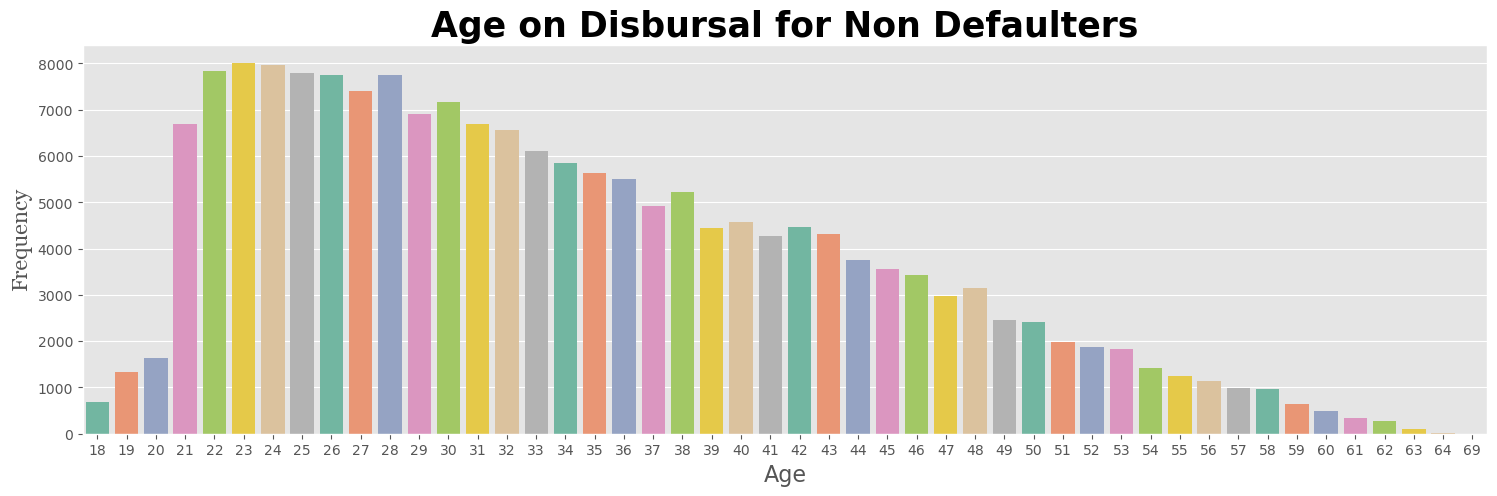

In [34]:
plt.figure(figsize = (15,5))
sns.countplot('age_on_disbursal', data = data[data.loan_default ==0],palette='Set2')
plt.title('Age on Disbursal for Non Defaulters',family='times', weight ='bold',fontsize= 25)
plt.tight_layout( )
plt.xlabel('Age',family='times',fontsize= 16)
plt.ylabel('Frequency',family='georgia',fontsize= 16)
plt.show()

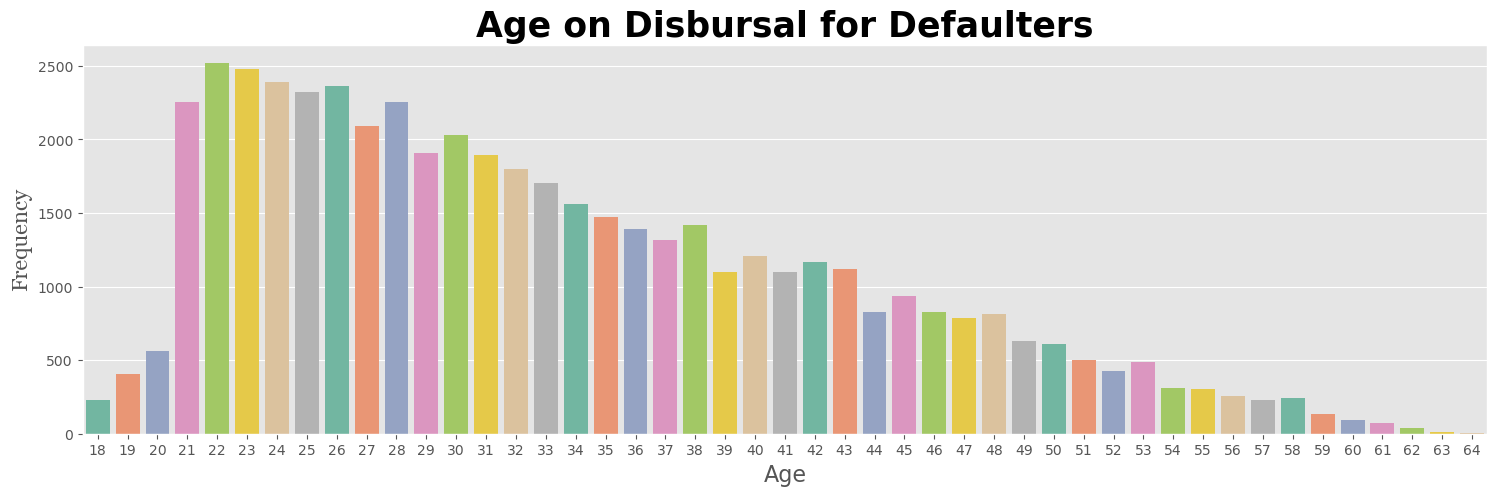

In [35]:
plt.figure(figsize = (15,5))
sns.countplot('age_on_disbursal', data = data[data.loan_default ==1],palette='Set2')
plt.title('Age on Disbursal for Defaulters',family='times', weight ='bold',fontsize= 25)
plt.tight_layout( )
plt.xlabel('Age',family='times',fontsize= 16)
plt.ylabel('Frequency',family='georgia',fontsize= 16)
plt.show()

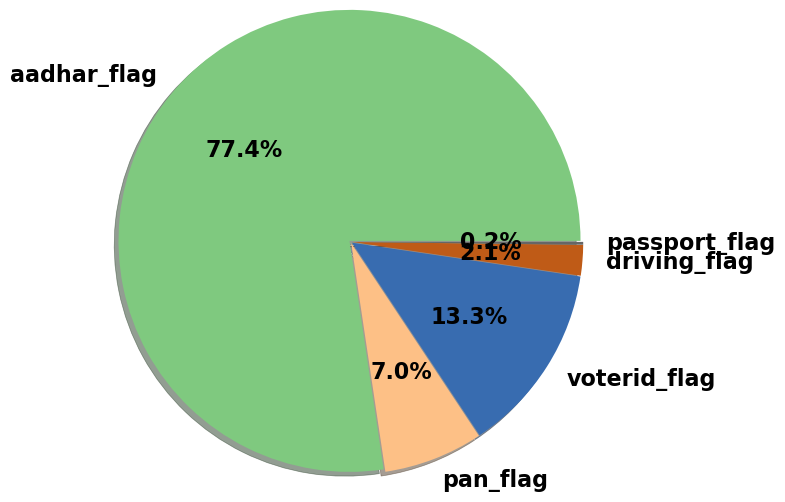

In [36]:
counts = data[['aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag']].sum()

plt.figure(figsize =(20,5))
counts.plot.pie(cmap ='Accent', autopct = '%0.1f%%', radius = 1.5, explode = [0.01]*len(counts), shadow = True,
                    textprops = {'family': 'times','color': 'black','weight': 'bold','size': 16})
plt.ylabel('')
plt.show()

In [37]:
data[['perform_cns_score', 'perform_cns_score_description']]

,perform_cns_score,perform_cns_score_description
0,0,No Bureau History Available
1,0,No Bureau History Available
2,0,No Bureau History Available
3,0,No Bureau History Available
4,0,No Bureau History Available
...,...,...
233149,14,Not Scored: Only a Guarantor
233150,14,Not Scored: Only a Guarantor
233151,11,Not Scored: More than 50 active Accounts found
233152,11,Not Scored: More than 50 active Accounts found


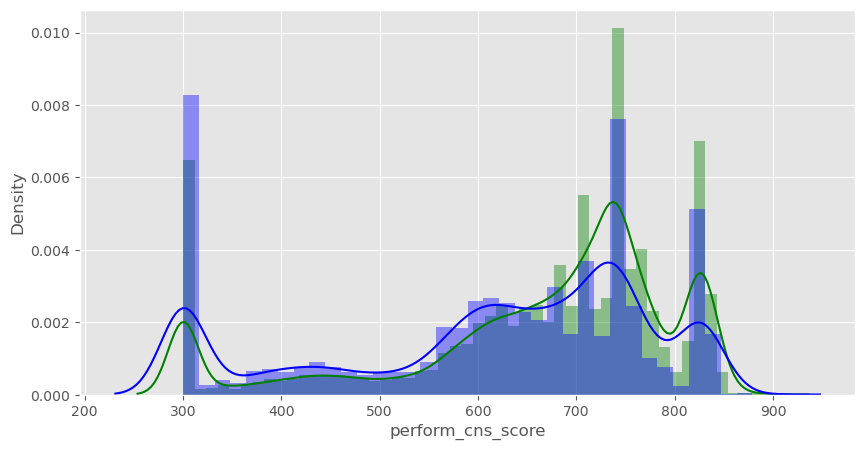

In [38]:
plt.figure(figsize = (10,5))
sns.distplot(data[(data.loan_default == 0)& (data.perform_cns_score >=100)].perform_cns_score, color = 'green')
sns.distplot(data[(data.loan_default == 1) & (data.perform_cns_score >=100)].perform_cns_score, color = 'blue')
plt.show()

In [39]:
data['perform_cat']= pd.cut(data.perform_cns_score, 
        bins = range(-1,901,100),
       labels = [0,1,2,3,4,5,6,7,8])

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


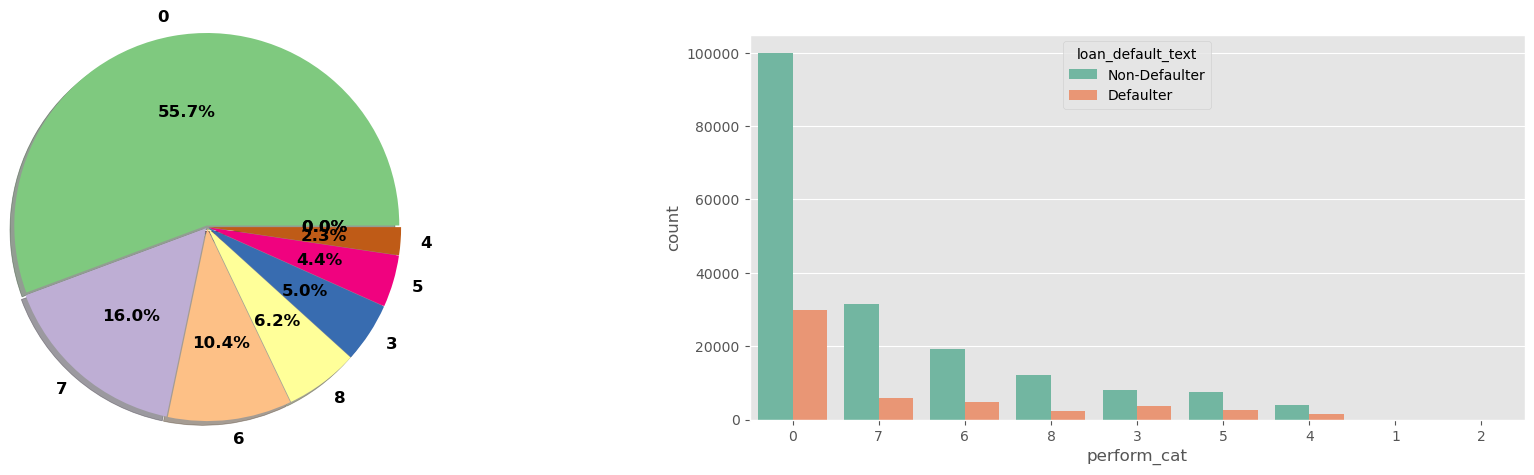

In [40]:
f,ax = plt.subplots(1,2, figsize = (22,5))
vc = data.perform_cat.value_counts()
vc.plot.pie(cmap ='Accent', autopct = '%0.1f%%', radius = 1.25, explode = [0.01]*len(vc), shadow = True,
                    textprops = {'family': 'times','color': 'black','weight': 'bold','size': 12}, ax = ax[0])
ax[0].set_ylabel('')
sns.countplot(data.perform_cat, hue = data.loan_default_text, order = vc.index, palette='Set2', ax = ax[1])
plt.show()

In [41]:
data["perform_score"] = 'No Score'
data.loc[data.perform_cns_score_description.str.contains('High'),'perform_score'] = "High"
data.loc[data.perform_cns_score_description.str.contains('Very High'),'perform_score'] = "Very High"
data.loc[data.perform_cns_score_description.str.contains('Low'),'perform_score'] = "Low"
data.loc[data.perform_cns_score_description.str.contains('Very Low'),'perform_score'] = "Very Low"
data.loc[data.perform_cns_score_description.str.contains('Medium'),'perform_score'] = "Medium"

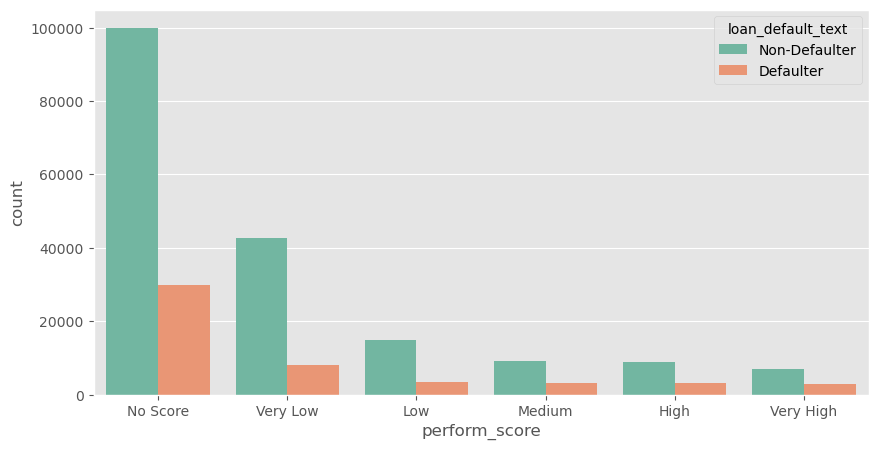

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='perform_score',hue='loan_default_text',data=data, palette='Set2')
plt.show()

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


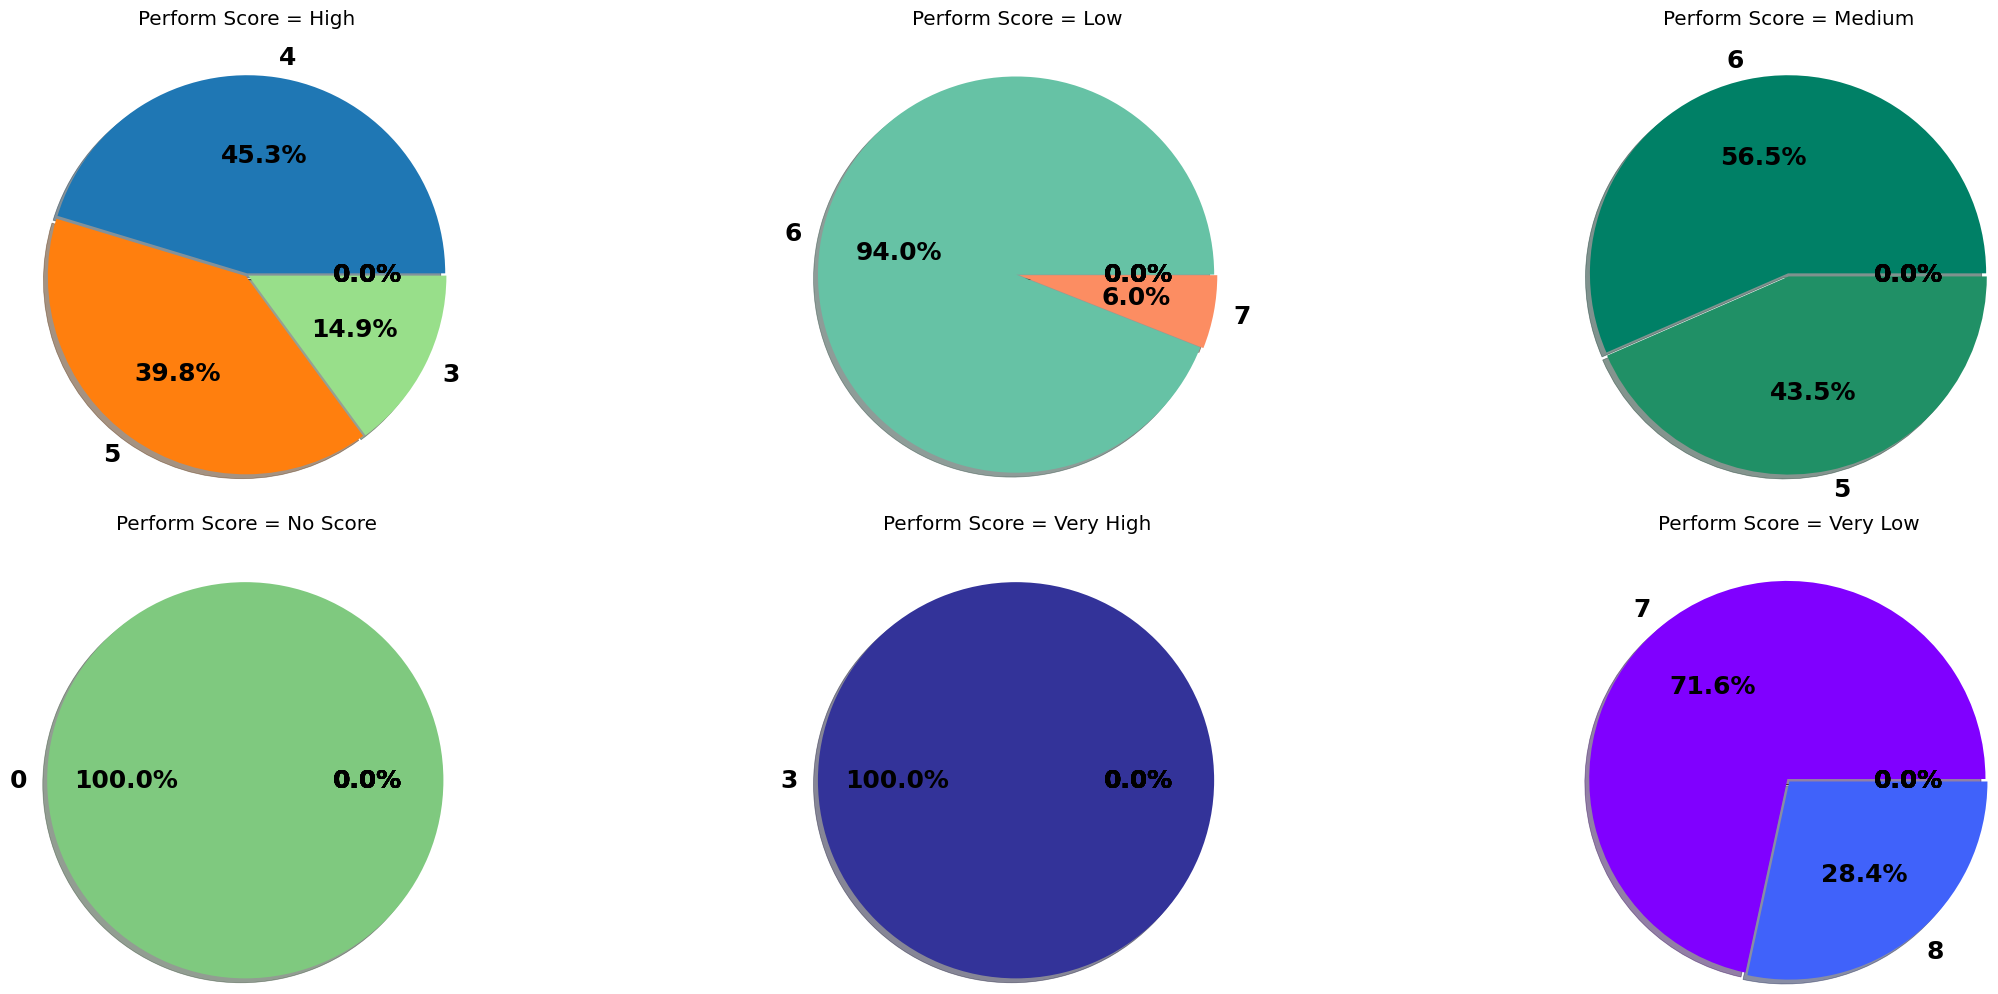

In [43]:
cmap = ['tab20','Set2','summer','Accent','terrain', 'rainbow','Paired']
perf_cat = list(data.perform_score.unique())
perf_cat.sort()
f,ax = plt.subplots(2,int(data.perform_score.nunique()/2),figsize = (25,10))
k = 0
for j in range(2):
    for i in range(int(len(perf_cat)/2)): 
        subdata = data[data.perform_score==perf_cat[k]].copy()
        vc = subdata.perform_cat.value_counts()
        vc.plot.pie(cmap =cmap[k], autopct = '%0.1f%%', radius = 1.25, explode = [0.01]*len(vc), shadow = True,
                        textprops = {'family': 'times','color': 'black','weight': 'bold','size': 18}, ax = ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_title('Perform Score = '+str(perf_cat[k])+'\n\n')
        k += 1
plt.tight_layout(w_pad = 1)

In [44]:
pri_account_info = data.columns[data.columns.str.contains('pri')]

TypeError: Horizontal orientation requires numeric `x` variable.

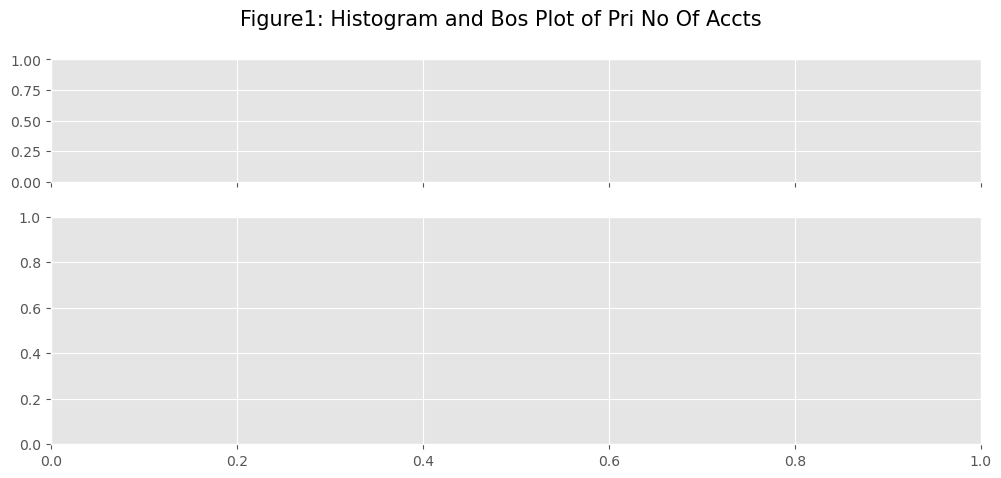

In [45]:
i = 1
for col in pri_account_info:
    f, (ax_box, ax_hist) = plt.subplots(2,1, figsize = (12,5),sharex = True, gridspec_kw={'height_ratios':(0.35,0.65)})
    plt.suptitle('Figure' + str(i) + ': Histogram and Bos Plot of ' + col.replace('_',' ').title(), fontsize = 15)
    sns.boxplot(data[col], ax= ax_box,color = 'red')
    sns.distplot(data[col], ax = ax_hist, color = 'magenta')
    sns.despine(ax = ax_box, left = True)
    sns.despine(ax= ax_hist, left = True)
    i = i+1
    plt.show()

In [46]:
sec_account_info = data.columns[data.columns.str.contains('sec')]

TypeError: Horizontal orientation requires numeric `x` variable.

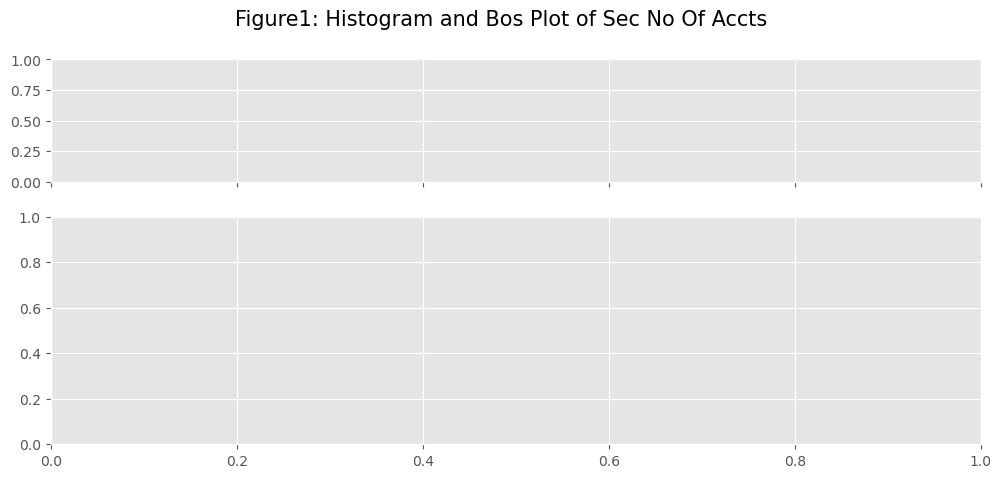

In [47]:
i = 1
for col in sec_account_info:
    f, (ax_box, ax_hist) = plt.subplots(2,1, figsize = (12,5),sharex = True, gridspec_kw={'height_ratios':(0.35,0.65)})
    plt.suptitle('Figure' + str(i) + ': Histogram and Bos Plot of ' + col.replace('_',' ').title(), fontsize = 15)
    sns.boxplot(data[col], ax= ax_box,color = 'red')
    sns.distplot(data[col], ax = ax_hist, color = 'magenta')
    sns.despine(ax = ax_box, left = True)
    sns.despine(ax= ax_hist, left = True)
    i = i+1
    plt.show()

In [48]:
cols = ['disbursed_amount', 'asset_cost', 'ltv','perform_cns_score','pri_current_balance', 'pri_sanctioned_amount','pri_disbursed_amount',
        'sec_current_balance', 'sec_sanctioned_amount','sec_disbursed_amount','primary_instal_amt', 'sec_instal_amt']

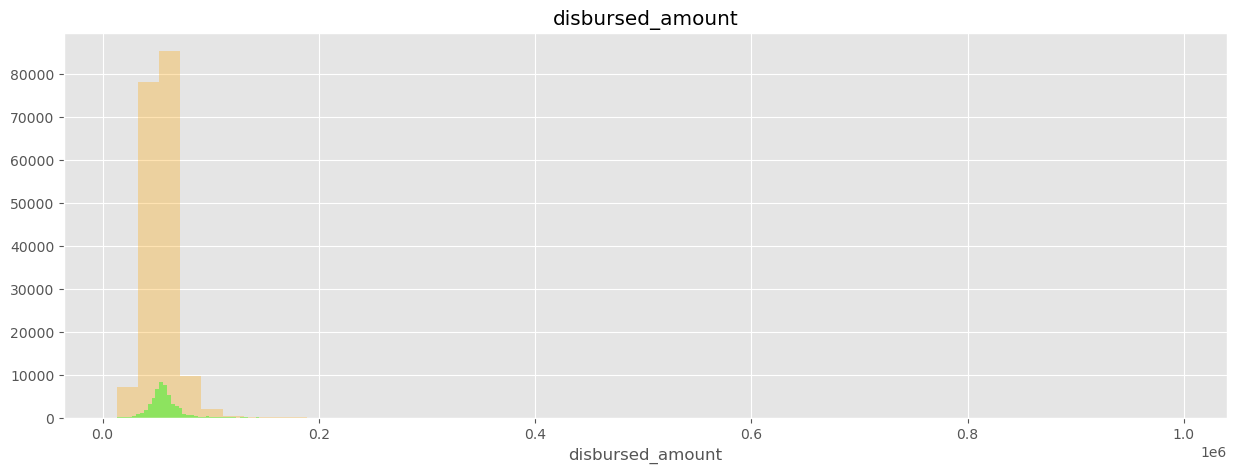

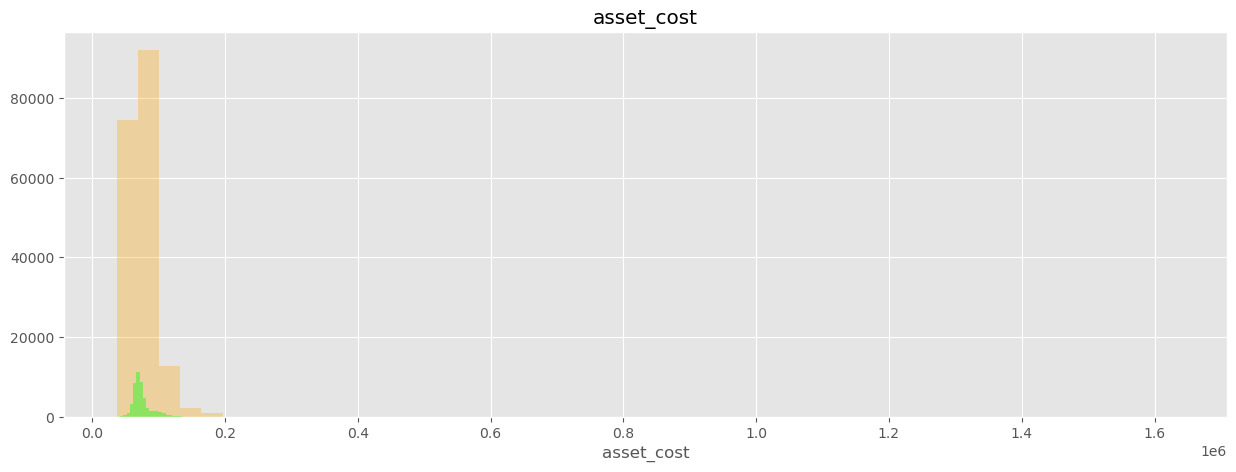

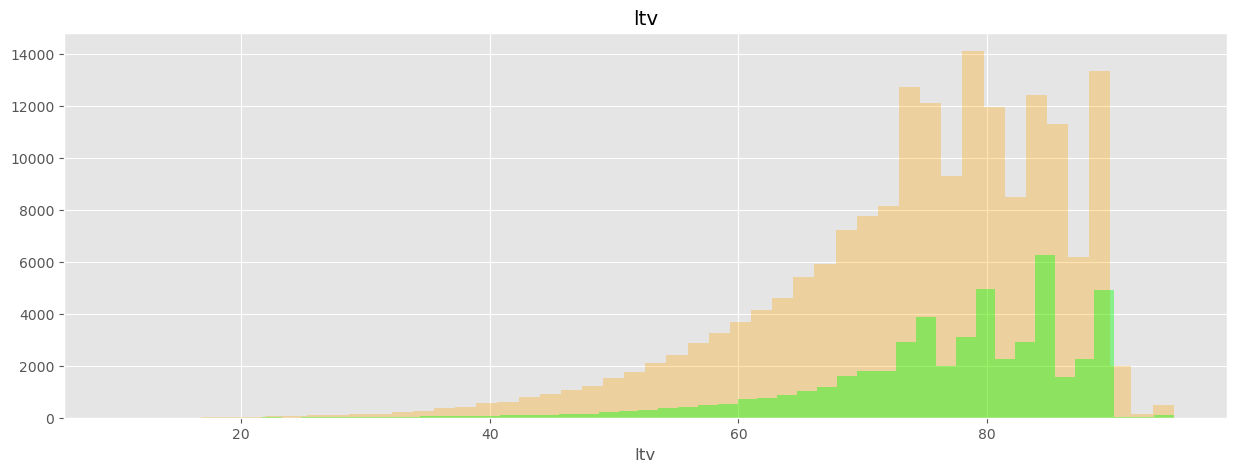

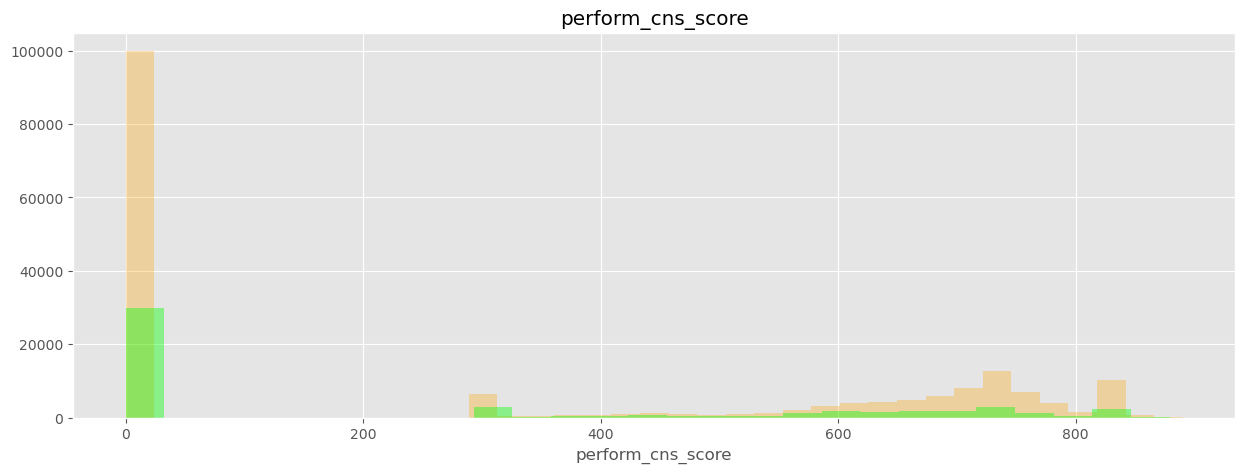

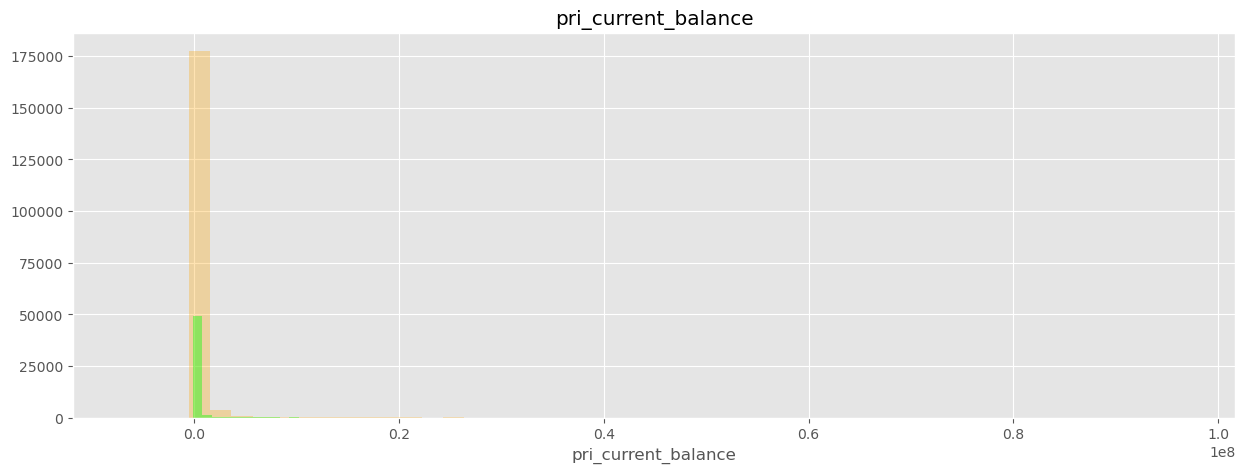

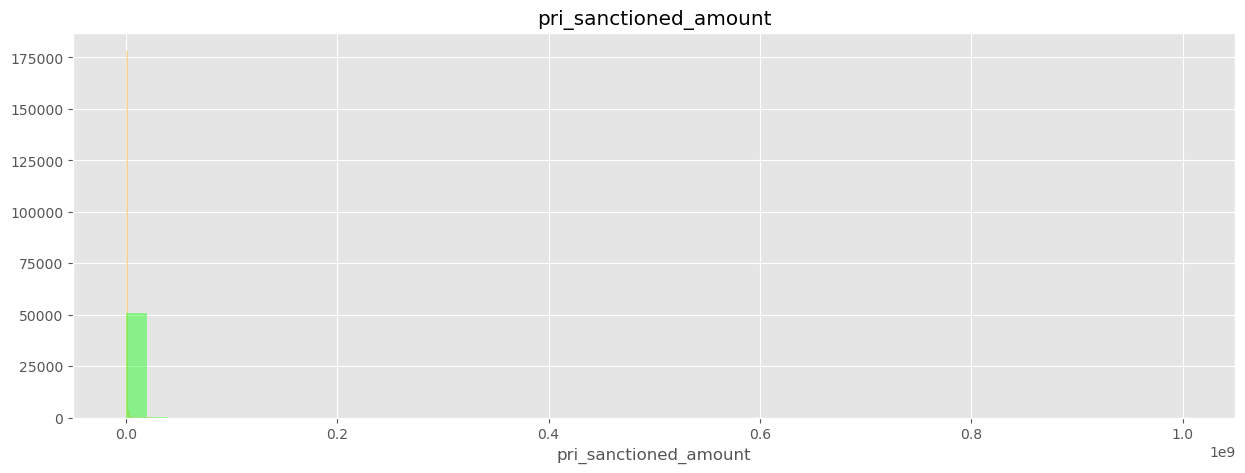

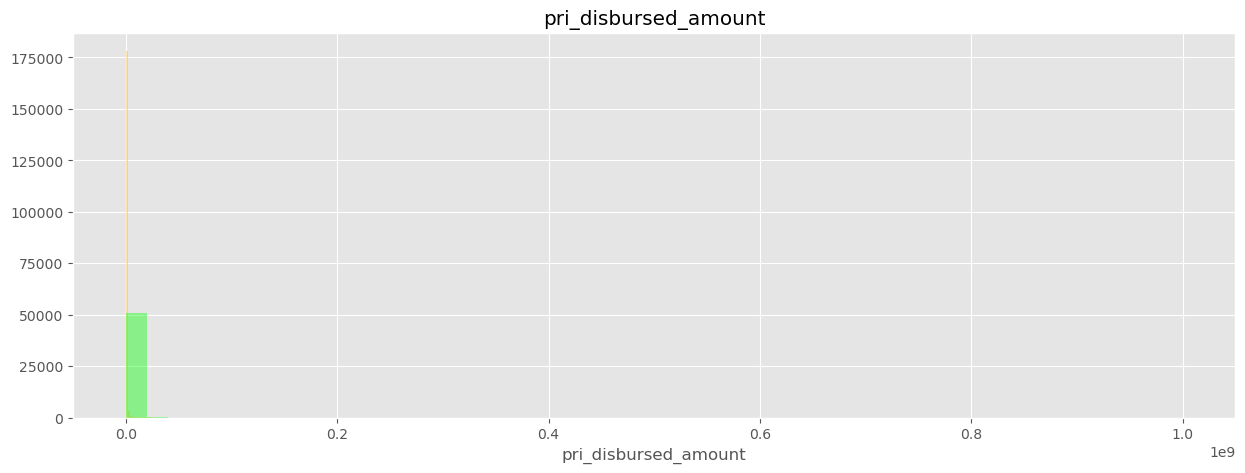

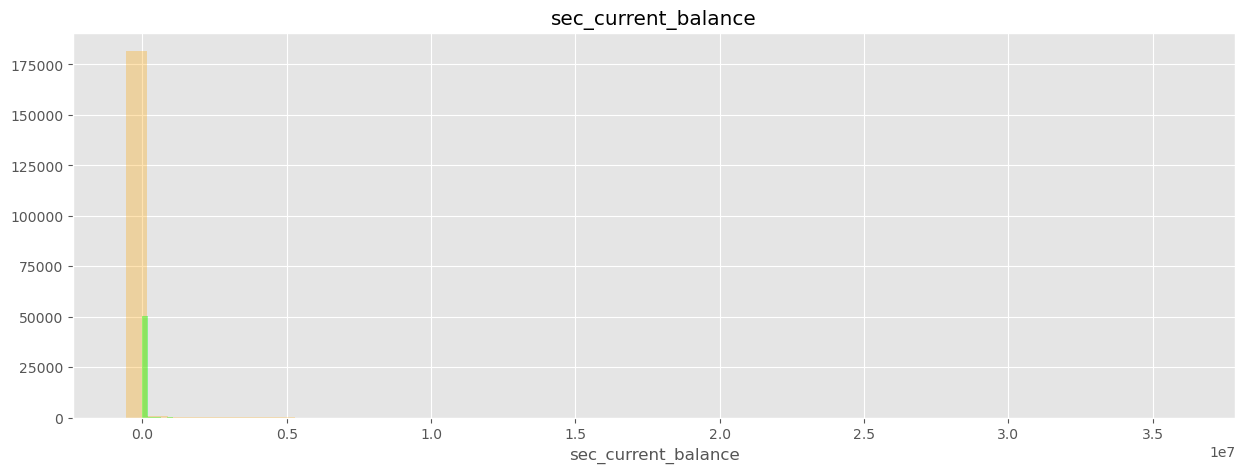

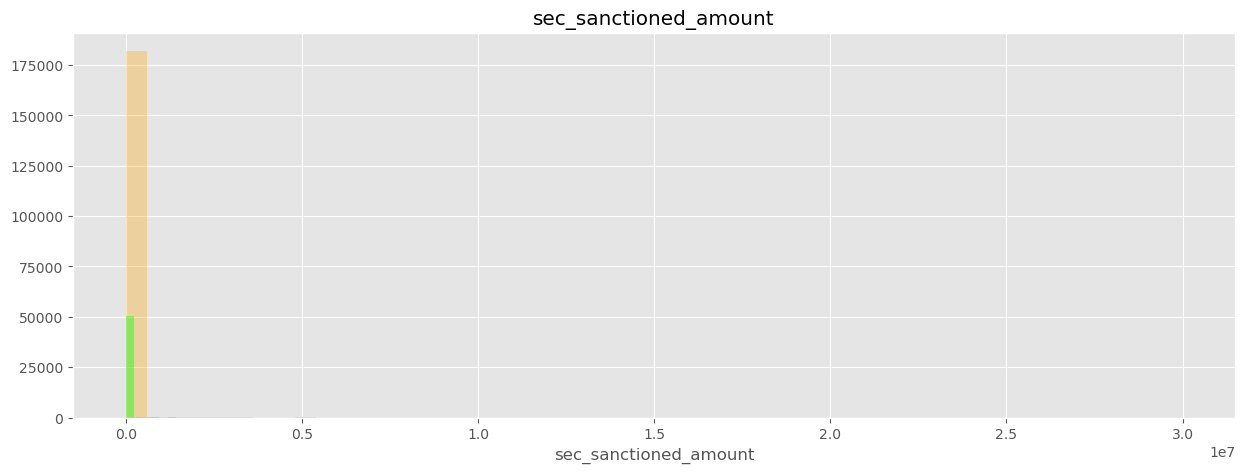

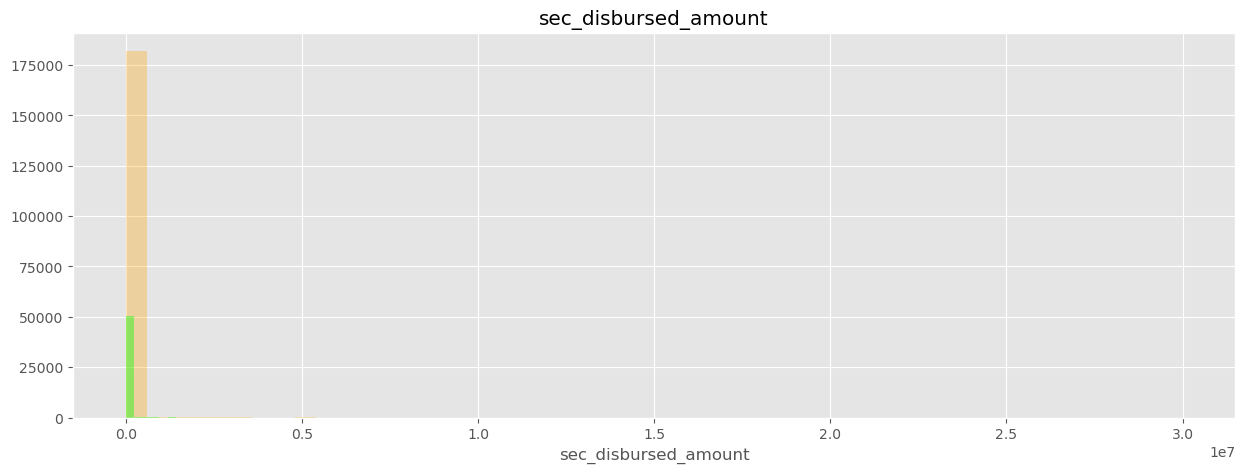

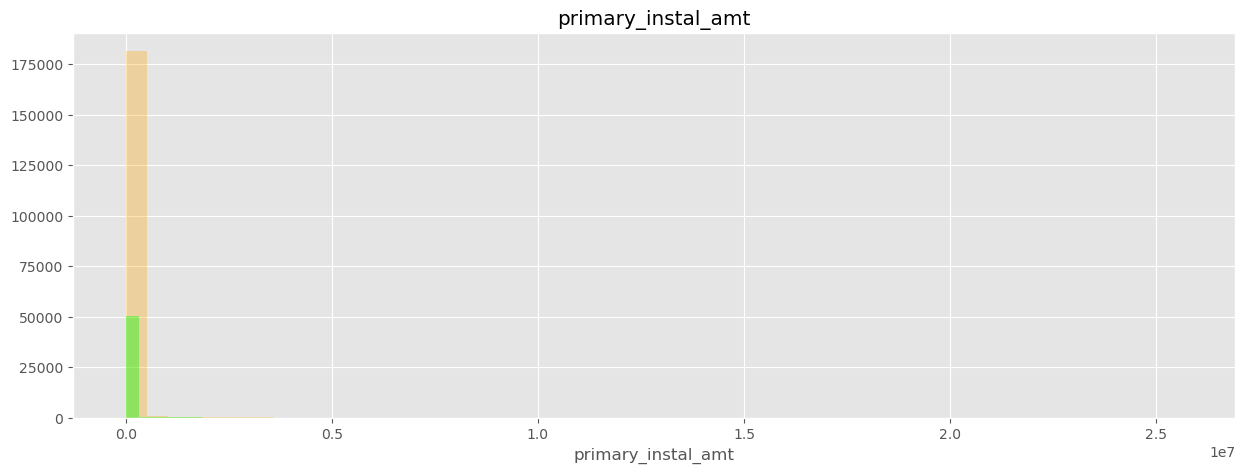

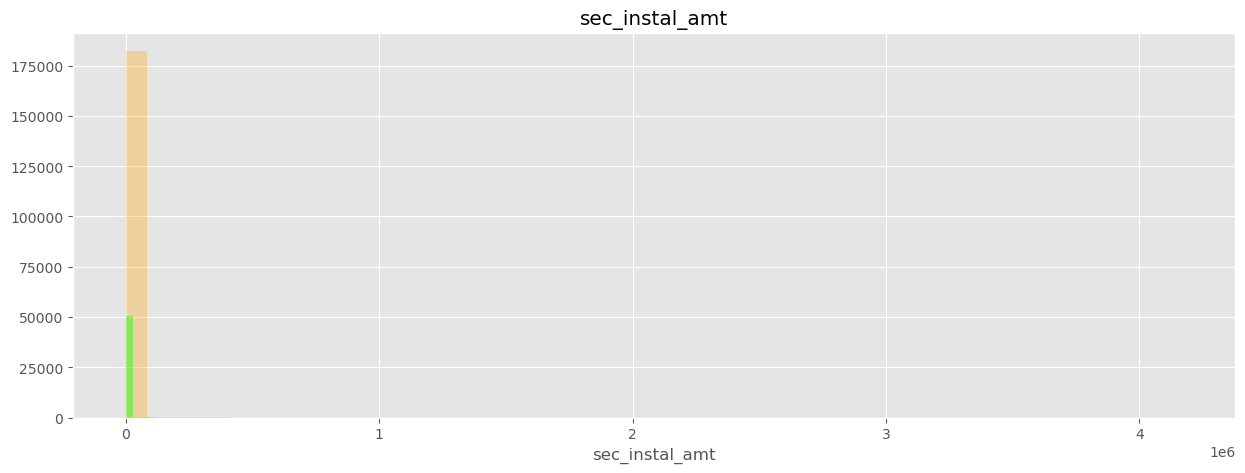

In [49]:
for i in cols:
    plt.figure(figsize = (15,5))
    data1 = data.loc[data.loan_default==0, i]
    data2 = data.loc[data.loan_default==1, i]
    sns.distplot(data1, kde = False, color= 'orange', hist_kws = {'alpha' : 0.3})
    sns.distplot(data2, kde = False, color = 'lime')
    plt.title(i)
    plt.show()

In [50]:
a = (list(data.columns))

In [51]:
a.sort()

In [52]:
def text_months(x):
    year = int(re.findall('\d',x)[0])
    month = int(re.findall('\d',x)[1])
    total = year*12 +month
    return total

In [53]:
data['avg_acnt_age_month'] = data.average_acct_age.astype('str').apply(text_months)
data['credit_history_months'] = data.credit_history_length.astype('str').apply(text_months)

In [54]:
data["credit_hist_cat"] = "Low"
data.loc[data.credit_history_months <= 48,"credit_hist_cat"] = "Low"
data.loc[data.credit_history_months > 48,"credit_hist_cat"] = "Medium"
data.loc[data.credit_history_months> 96,"credit_hist_cat"] = "High"

In [55]:
data["loan_tenure"] = 'least_pref'
data.loc[data.avg_acnt_age_month<= 60,"loan_tenure"] ="most_pref"

In [56]:
data["preferred_age"] = 'Negative'
data.loc[data.age_on_disbursal > 100,  "preferred_age"] = "least_pref"
data.loc[data.age_on_disbursal >= 336, "preferred_age"] = "most_pref"

In [57]:
cat_columns = ['branch_id', 'supplier_id', 'manufacturer_id', 'state_id', 'employment_type',
               'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag',
               'new_accts_in_last_six_months','delinquent_accts_in_last_six_months',
               'pri_no_of_accts', 'pri_active_accts','pri_overdue_accts','sec_no_of_accts', 'sec_active_accts','sec_overdue_accts','loan_tenure','credit_hist_cat',
                'perform_cat', 'perform_score', 'preferred_age','loan_default']
quant_columns = ['disbursed_amount', 'asset_cost', 'ltv','pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
                'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt']

In [58]:
final_columns = cat_columns + quant_columns

In [59]:
final_data = data[final_columns]

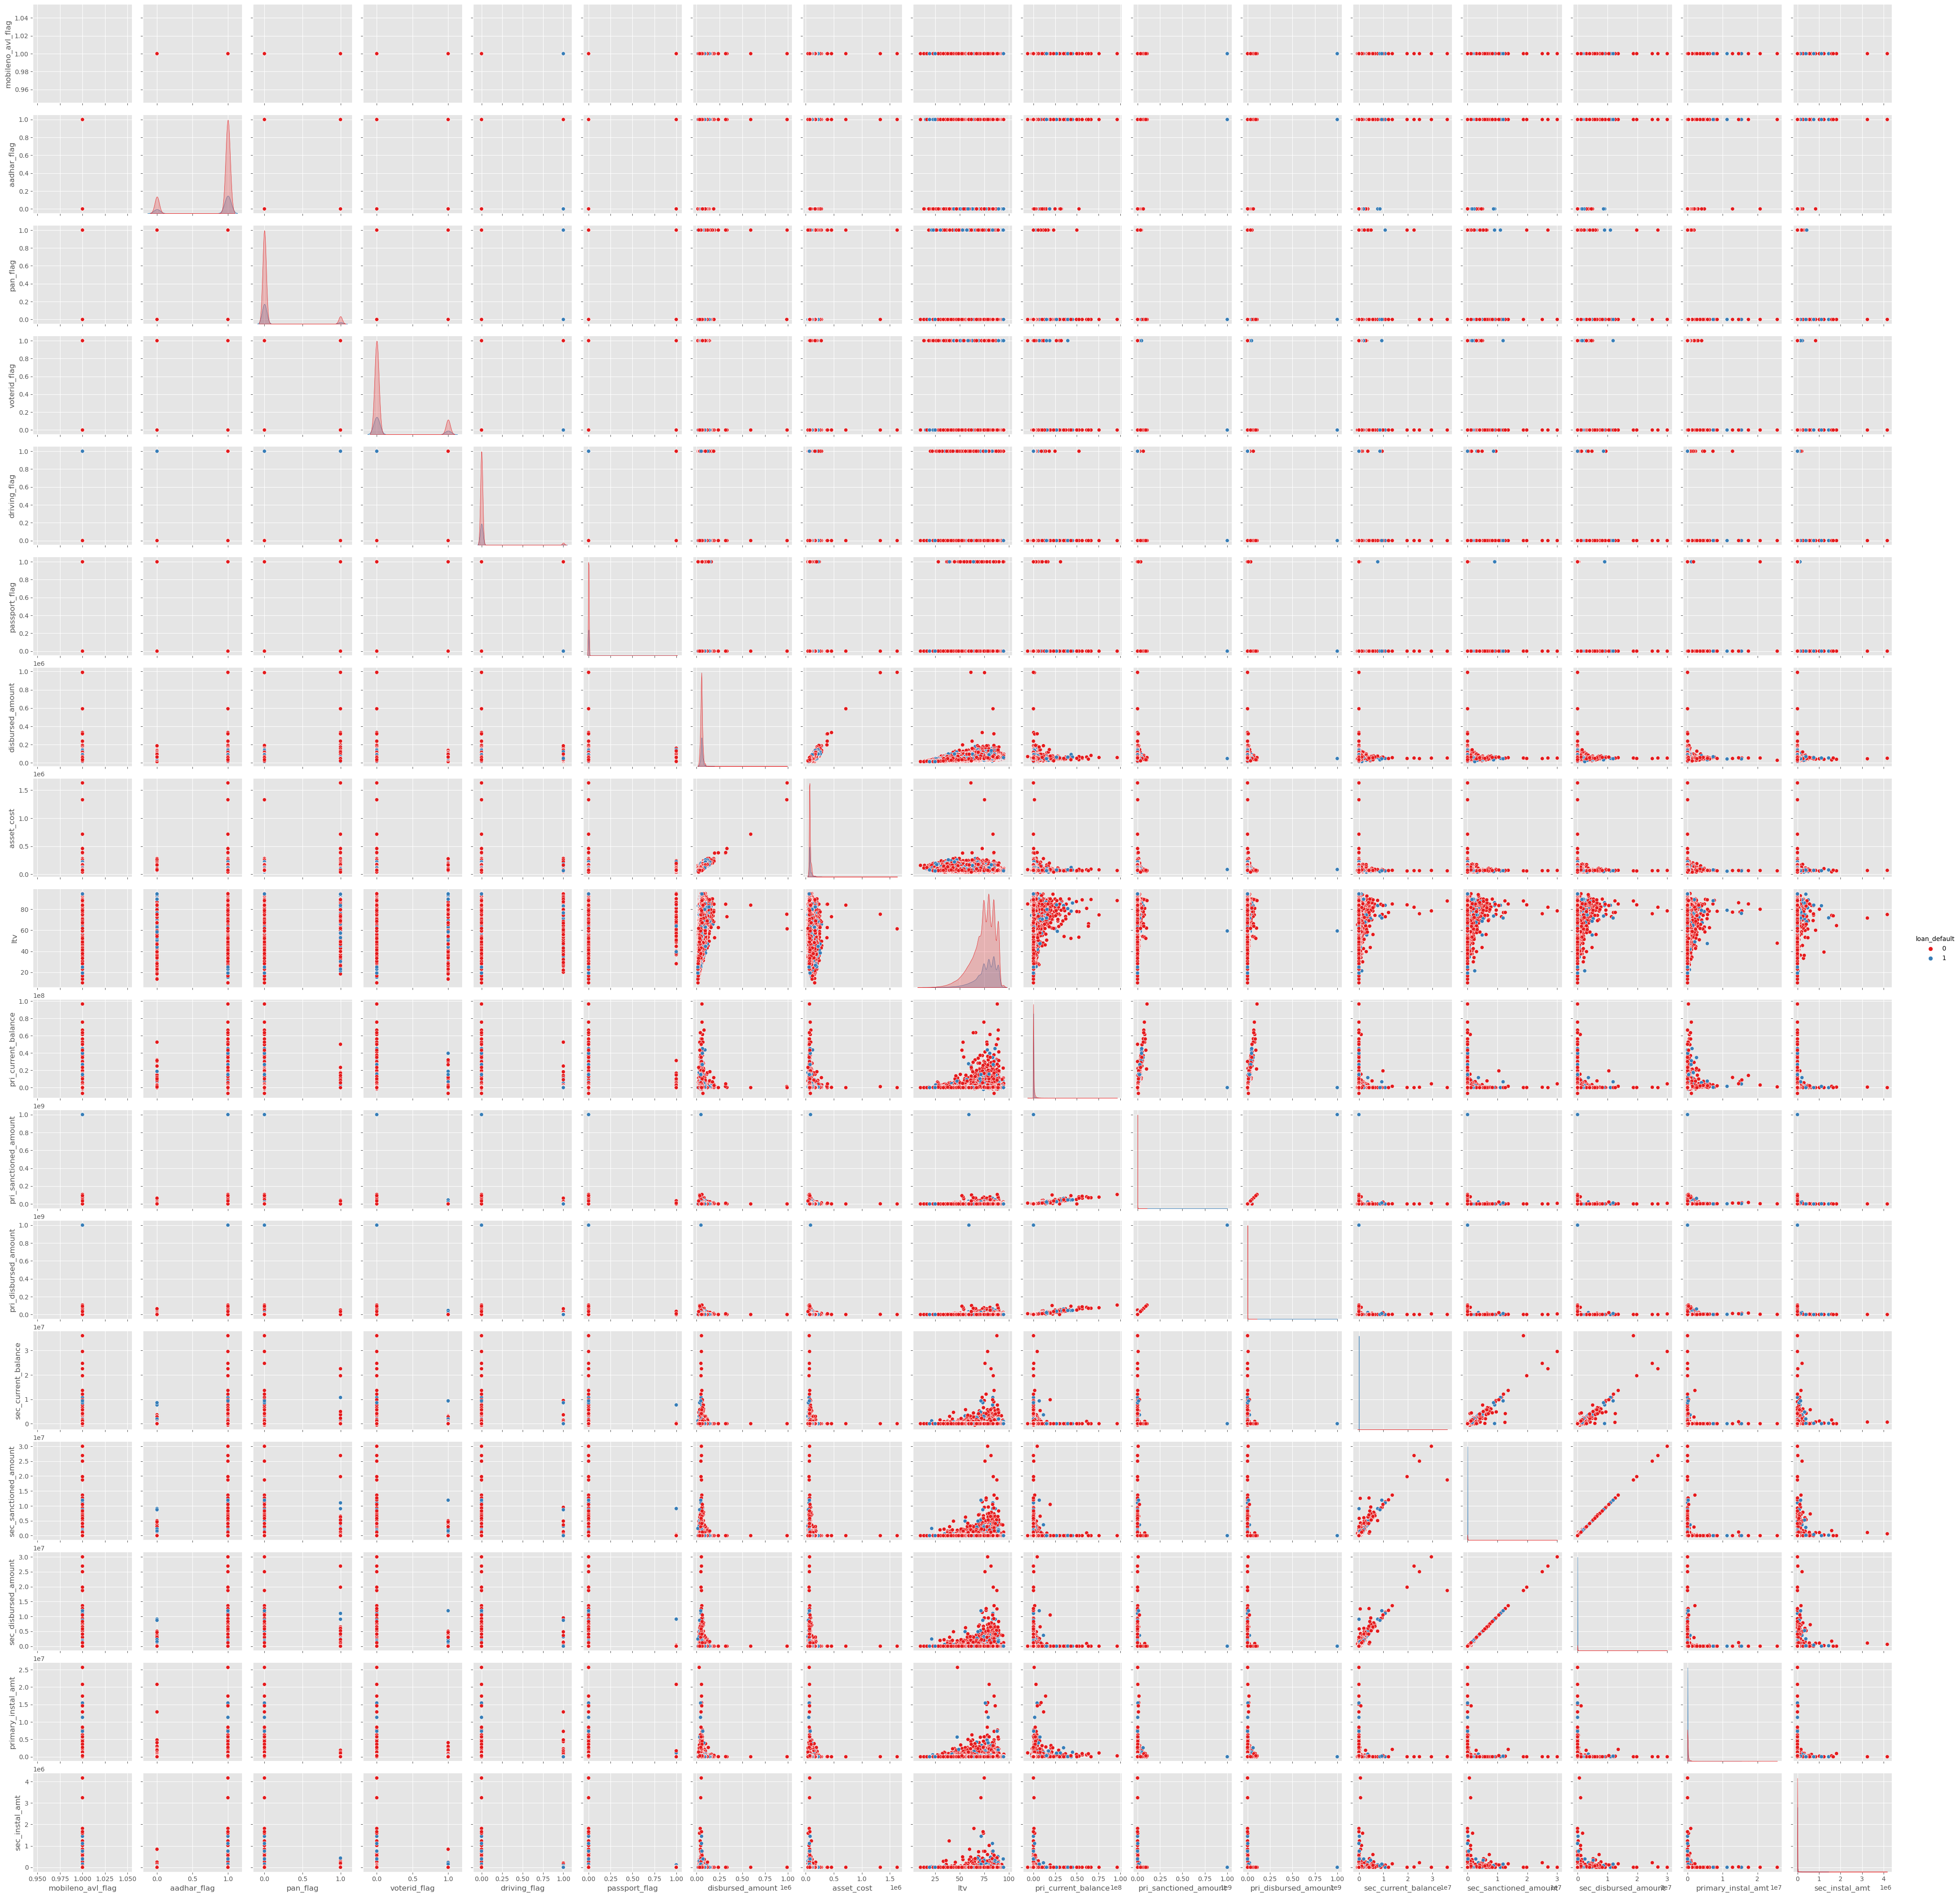

In [60]:
sns.pairplot(final_data, hue = 'loan_default', palette='Set1')

In [72]:
for i in cat_columns:
    if i != 'loan_default':
        final_data[i]= final_data[i].astype('object')

In [73]:
final_data.describe(include = 'object').T

,count,unique,top,freq
branch_id,233154,82,2,13138
supplier_id,233154,2953,18317,1432
manufacturer_id,233154,11,86,109534
state_id,233154,22,4,44870
employment_type,233154,3,Self employed,127635
mobileno_avl_flag,233154,1,1,233154
aadhar_flag,233154,2,1,195924
pan_flag,233154,2,0,215533
voterid_flag,233154,2,0,199360
driving_flag,233154,2,0,227735


In [74]:
final_data.head()

,branch_id,supplier_id,manufacturer_id,state_id,employment_type,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,...,asset_cost,ltv,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt
0,67,22807,45,6,Salaried,1,1,0,0,0,...,58400,89.55,0,0,0,0,0,0,0,0
1,67,22807,45,6,Self employed,1,1,0,0,0,...,61360,89.63,0,0,0,0,0,0,0,0
2,67,22807,45,6,Self employed,1,1,0,0,0,...,60300,88.39,0,0,0,0,0,0,0,0
3,67,22807,45,6,Salaried,1,1,0,0,0,...,61500,76.42,0,0,0,0,0,0,0,0
4,67,22744,86,6,Self employed,1,1,0,0,0,...,78256,57.50,0,0,0,0,0,0,0,0


In [75]:
train,test =split(final_data, test_size = 0.3, random_state = 12)

In [76]:
data_dummy = pd.get_dummies(final_data)
data_dummy.columns 

Index(['loan_default', 'disbursed_amount', 'asset_cost', 'ltv',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       ...
       'perform_cat_6', 'perform_cat_7', 'perform_cat_8', 'perform_score_High',
       'perform_score_Low', 'perform_score_Medium', 'perform_score_No Score',
       'perform_score_Very High', 'perform_score_Very Low',
       'preferred_age_Negative'],
      dtype='object', length=3392)

In [77]:
train, test = split(data_dummy, test_size = .30, random_state = 12)
train.shape

train.head(2)
X_train = train.drop('loan_default', axis = 1)
Y_train = train.loan_default
X_test = test.drop('loan_default', axis = 1)
Y_test = test.loan_default
lr = LogisticRegression()
# lr.fit(X_train,Y_train)

# pred = lr.predict(X_test)

# print('Accuracy Score',accuracy_score(y_true = Y_test,y_pred = pred))

In [78]:
train[train['loan_default'] != 0]['loan_default']

138200    1
215261    1
103760    1
46336     1
210870    1
         ..
8651      1
20953     1
151181    1
114565    1
208716    1
Name: loan_default, Length: 35605, dtype: int64

In [79]:
print(classification_report(y_true=Y_test,y_pred = pred))

NameError: name 'pred' is not defined